<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Forecasting_for_RES/blob/main/HPP_LW2_inflowBureya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Метод линейной регрессии

Регрессия – это условное математическое ожидание непрерывной зависимой (выходной) переменной при наблюдаемых значениях независимых (входных) переменных. Линейная регрессия основана на гипотезе, что искомая зависимость – линейная. Каждая независимая переменная вносит аддитивный вклад в результирующее значение с некоторым весом, называемом коэффициентом регрессии.

Если установлена тесная линейная корреляция между переменными, то можно вывести уравнение прямой и использовать её для прогнозирования поведения зависимой переменной в будущем. Этот процесс носит название ЛИНЕЙНОЙ РЕГРЕССИИ.

Линейная модель уравнения регрессии строится по методу наименьших квадратов. Этот критерий минимизирует сумму квадратов вертикальных отклонений точек от прямой регрессии.

Достоинства линейной регрессии:
*   Скорость и простота получения модели.
*   Интерпретируемость модели. Линейная модель является прозрачной и понятной для аналитика.


## Метод полиномиальной регрессии

Полиномиальная регрессия означает приближение данных (xi,yi) полиномом k–й степени A(x)=a+b×x+c×x^2+d×x^3+…+h×x^k. При k=1 полином является прямой линией, при k=2 – параболой, при k=3 – кубической параболой и т. д.

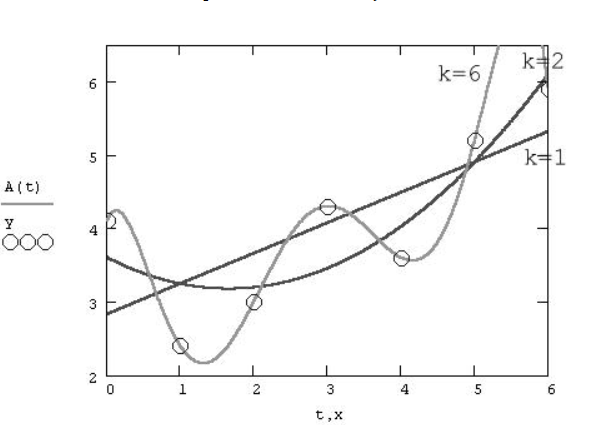

## Описание параметров оценки качества прогнозной модели

Наиболее часто на практике для анализа адекватности модели прогноза исследуемым различным процессам используются абсолютные показатели, позволяющие количественно определить величину ошибки моделирования в единицах измерения прогнозируемого объекта. К ним относятся:



*   абсолютная ошибка, определяемая как разность между фактическим значением показателя и его расчётным значением






image.png

*   средняя абсолютная ошибка




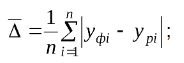

*   среднеквадратическая ошибка

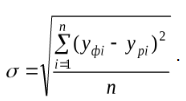

Следует отметить, что абсолютные показатели малопригодны для сравнения и анализа точности моделирования разнородных объектов, так как их значения существенно зависят от масштаба измерения исследуемых явлений. В этих случаях используются относительные показатели:

*   относительная ошибка




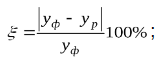




*   средняя относительная ошибка

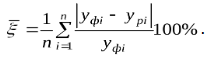

## Импорт библиотек

In [ ]:
#Для работы с данными
import pandas as pd
import numpy as np

#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sn

#Для моделей регрессии
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree

#Для разделения данных на выборки
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

#Для оценивания прогноза (метрики точности)
import sklearn.metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

In [ ]:
def MAPE(y_t, y_p):
  y_t, y_p = np.array(y_t), np.array(y_p)
  Err=np.mean(np.abs((y_t - y_p)/y_t) * 100)
  return (Err)

In [ ]:
inflow_data2 = pd.read_excel('/content/drive/MyDrive/Initial_data_PW2.xlsx', sheet_name= 'В1.Бурея')
data = pd.DataFrame(data=inflow_data2)
data

,Месяцы/годы,1,2,3,4,5,6,7,8,9,10,11,12
0,1913,33.4,9.4,8.4,624.0,2270,1310,1550,2870,1800,814,367,136.0
1,1914,32.5,14.0,12.0,292.0,2450,2020,2360,2330,2480,794,223,34.6
2,1915,9.1,5.1,5.8,69.2,2180,2780,2140,4520,2660,1070,578,189.0
3,1916,39.6,15.6,12.8,141.0,2940,3370,1720,2610,1530,691,261,114.0
4,1917,34.5,13.6,10.0,346.0,1430,2200,3980,2690,1590,825,392,150.0
5,1918,36.8,15.0,12.9,196.0,2660,2540,2880,2500,2860,1910,460,172.0
6,1924,29.7,12.3,9.5,241.0,2100,1560,3540,1940,1730,755,356,106.0
7,1925,30.0,13.0,9.4,174.0,561,685,813,1910,1320,726,258,38.5
8,1926,31.2,13.6,11.0,88.8,945,730,1010,985,1040,875,224,108.0
9,1927,24.8,10.8,7.9,392.0,1870,1820,1360,1670,771,1000,330,119.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Установка первого столбца в качестве индекса строк
data.set_index(data.iloc[:, 0], inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data

,1,2,3,4,5,6,7,8,9,10,11,12
Месяцы/годы,,,,,,,,,,,,
1913,33.4,9.4,8.4,624.0,2270,1310,1550,2870,1800,814,367,136.0
1914,32.5,14.0,12.0,292.0,2450,2020,2360,2330,2480,794,223,34.6
1915,9.1,5.1,5.8,69.2,2180,2780,2140,4520,2660,1070,578,189.0
1916,39.6,15.6,12.8,141.0,2940,3370,1720,2610,1530,691,261,114.0
1917,34.5,13.6,10.0,346.0,1430,2200,3980,2690,1590,825,392,150.0
1918,36.8,15.0,12.9,196.0,2660,2540,2880,2500,2860,1910,460,172.0
1924,29.7,12.3,9.5,241.0,2100,1560,3540,1940,1730,755,356,106.0
1925,30.0,13.0,9.4,174.0,561,685,813,1910,1320,726,258,38.5
1926,31.2,13.6,11.0,88.8,945,730,1010,985,1040,875,224,108.0


In [ ]:
# Преобразование DataFrame в Series
series = data.stack()
print(series)

Месяцы/годы    
1913         1       33.4
             2        9.4
             3        8.4
             4      624.0
             5     2270.0
                    ...  
1971         8     2330.0
             9     2480.0
             10     794.0
             11     223.0
             12      34.6
Length: 648, dtype: float64


In [ ]:
data.dtypes

1     float64
2     float64
3     float64
4     float64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12    float64
dtype: object

In [ ]:
# Создание новой серии со сдвинутыми значениями
data_shift = series.shift(-1)[0:]
data_shift = data_shift.iloc[:-1]
data_shift

Месяцы/годы    
1913         1        9.4
             2        8.4
             3      624.0
             4     2270.0
             5     1310.0
                    ...  
1971         7     2330.0
             8     2480.0
             9      794.0
             10     223.0
             11      34.6
Length: 647, dtype: float64

In [ ]:
series = series.iloc[:-1]

In [ ]:
X = data_shift
y = series

In [ ]:
X_train = X.iloc[0:round(len(data_shift)*0.8)]
y_train = y.iloc[0:round(len(series)*0.8)]
X_test = X.iloc[round(len(data_shift)*0.8):]
y_test = y.iloc[round(len(series)*0.8):]
#сохраняем тестовую выборку на всякий случай
y_test.to_excel('/y_test.xlsx')
X_test.to_excel('/X_test.xlsx')

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

##Линейная регрессия

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
scoring  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores = cross_validate(lin_reg, X_train, y_train, scoring = scoring, cv=ShuffleSplit(n_splits=4))
y_pred = lin_reg.predict(X_test)
print('Cross-Validation errors')
DF_reg = pd.DataFrame(scores)
display(DF_reg)
print('Test errors')
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred))

Cross-Validation errors


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.011646,0.001614,0.575142,-458174.575442,-490.491069,-2482.553291
1,0.001198,0.011792,0.373893,-681581.969691,-601.145435,-2130.714008
2,0.001314,0.001328,0.569427,-451318.665815,-516.536915,-1860.608314
3,0.001597,0.001523,0.492000,-404198.235252,-474.217227,-1683.953562


Test errors
Mean squared error on test_set: 395315.5852
Root Mean Square Error on test_set: 628.7413
Root Absolute Percented Error on test_set: 1921.2847
R2  on test_set: 0.4830


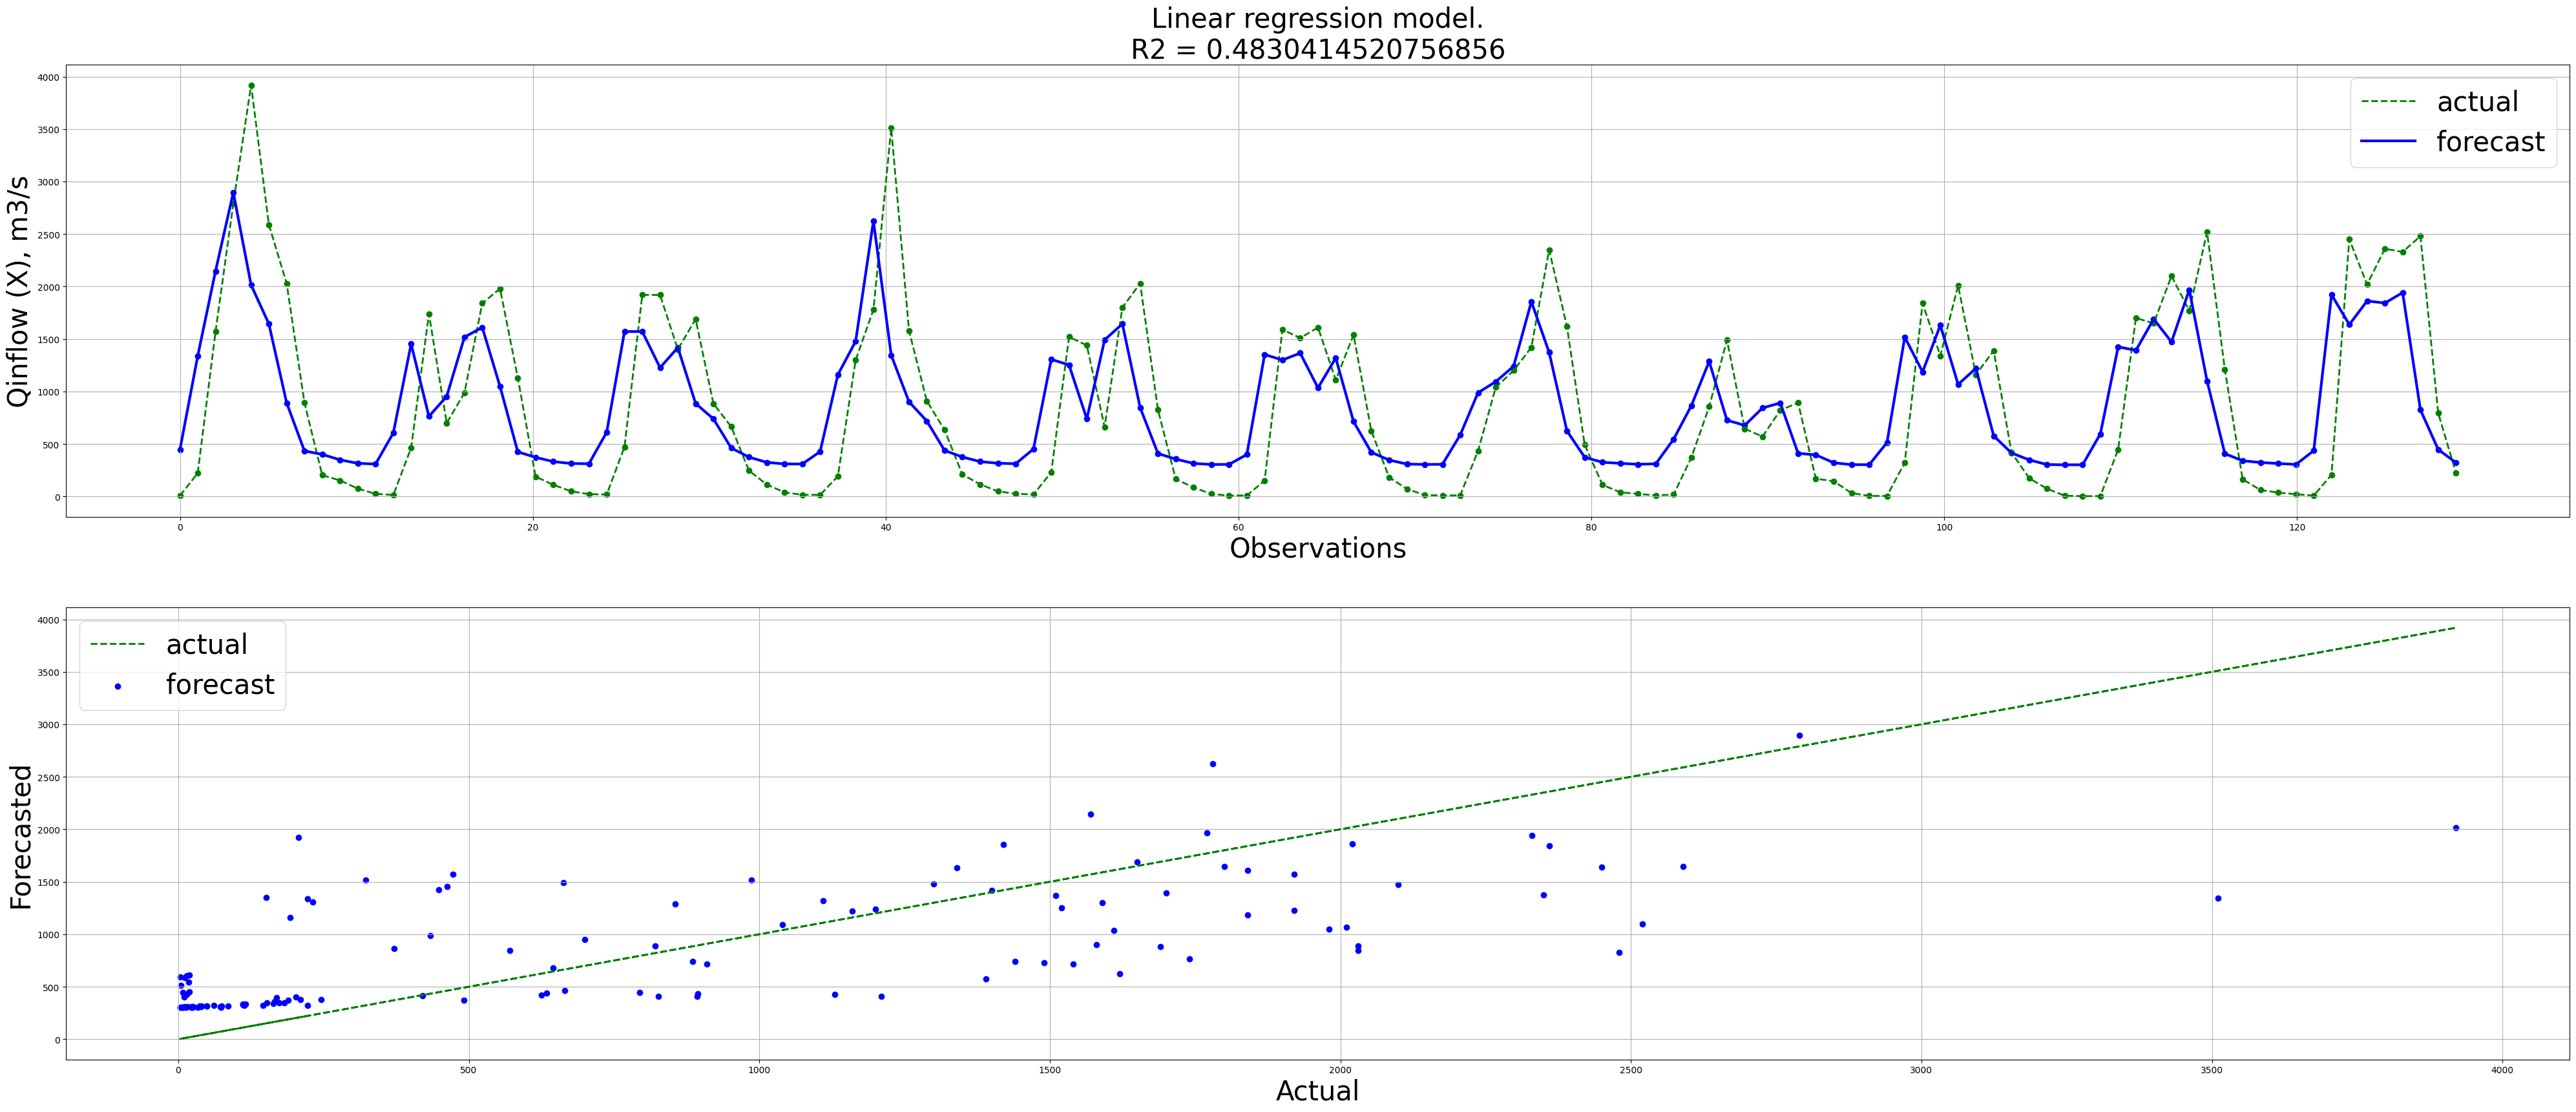

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Linear regression model.\nR2 = {r2_score(y_test,y_pred)}', fontsize=30)
plt.scatter(x, y_pred, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

##Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.pipeline import Pipeline

In [ ]:
PF = poly(degree=2, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002496,0.001832,0.597207,-407797.532986,-438.071039,-1943.946132
1,0.002288,0.001520,0.404809,-394398.394965,-424.106284,-1801.075026
2,0.002199,0.001544,0.304287,-488969.894459,-482.687602,-1863.242508
3,0.002159,0.001548,0.460990,-402633.916748,-449.291033,-1534.350244
4,0.002173,0.001500,0.449138,-637863.732403,-546.608684,-2589.090489


Mean squared error on test_set: 386950.8771
Root Mean Square Error on test_set: 622.0538
Root Absolute Percented Error on test_set: 2006.0656
R2  on test_set: 0.4940


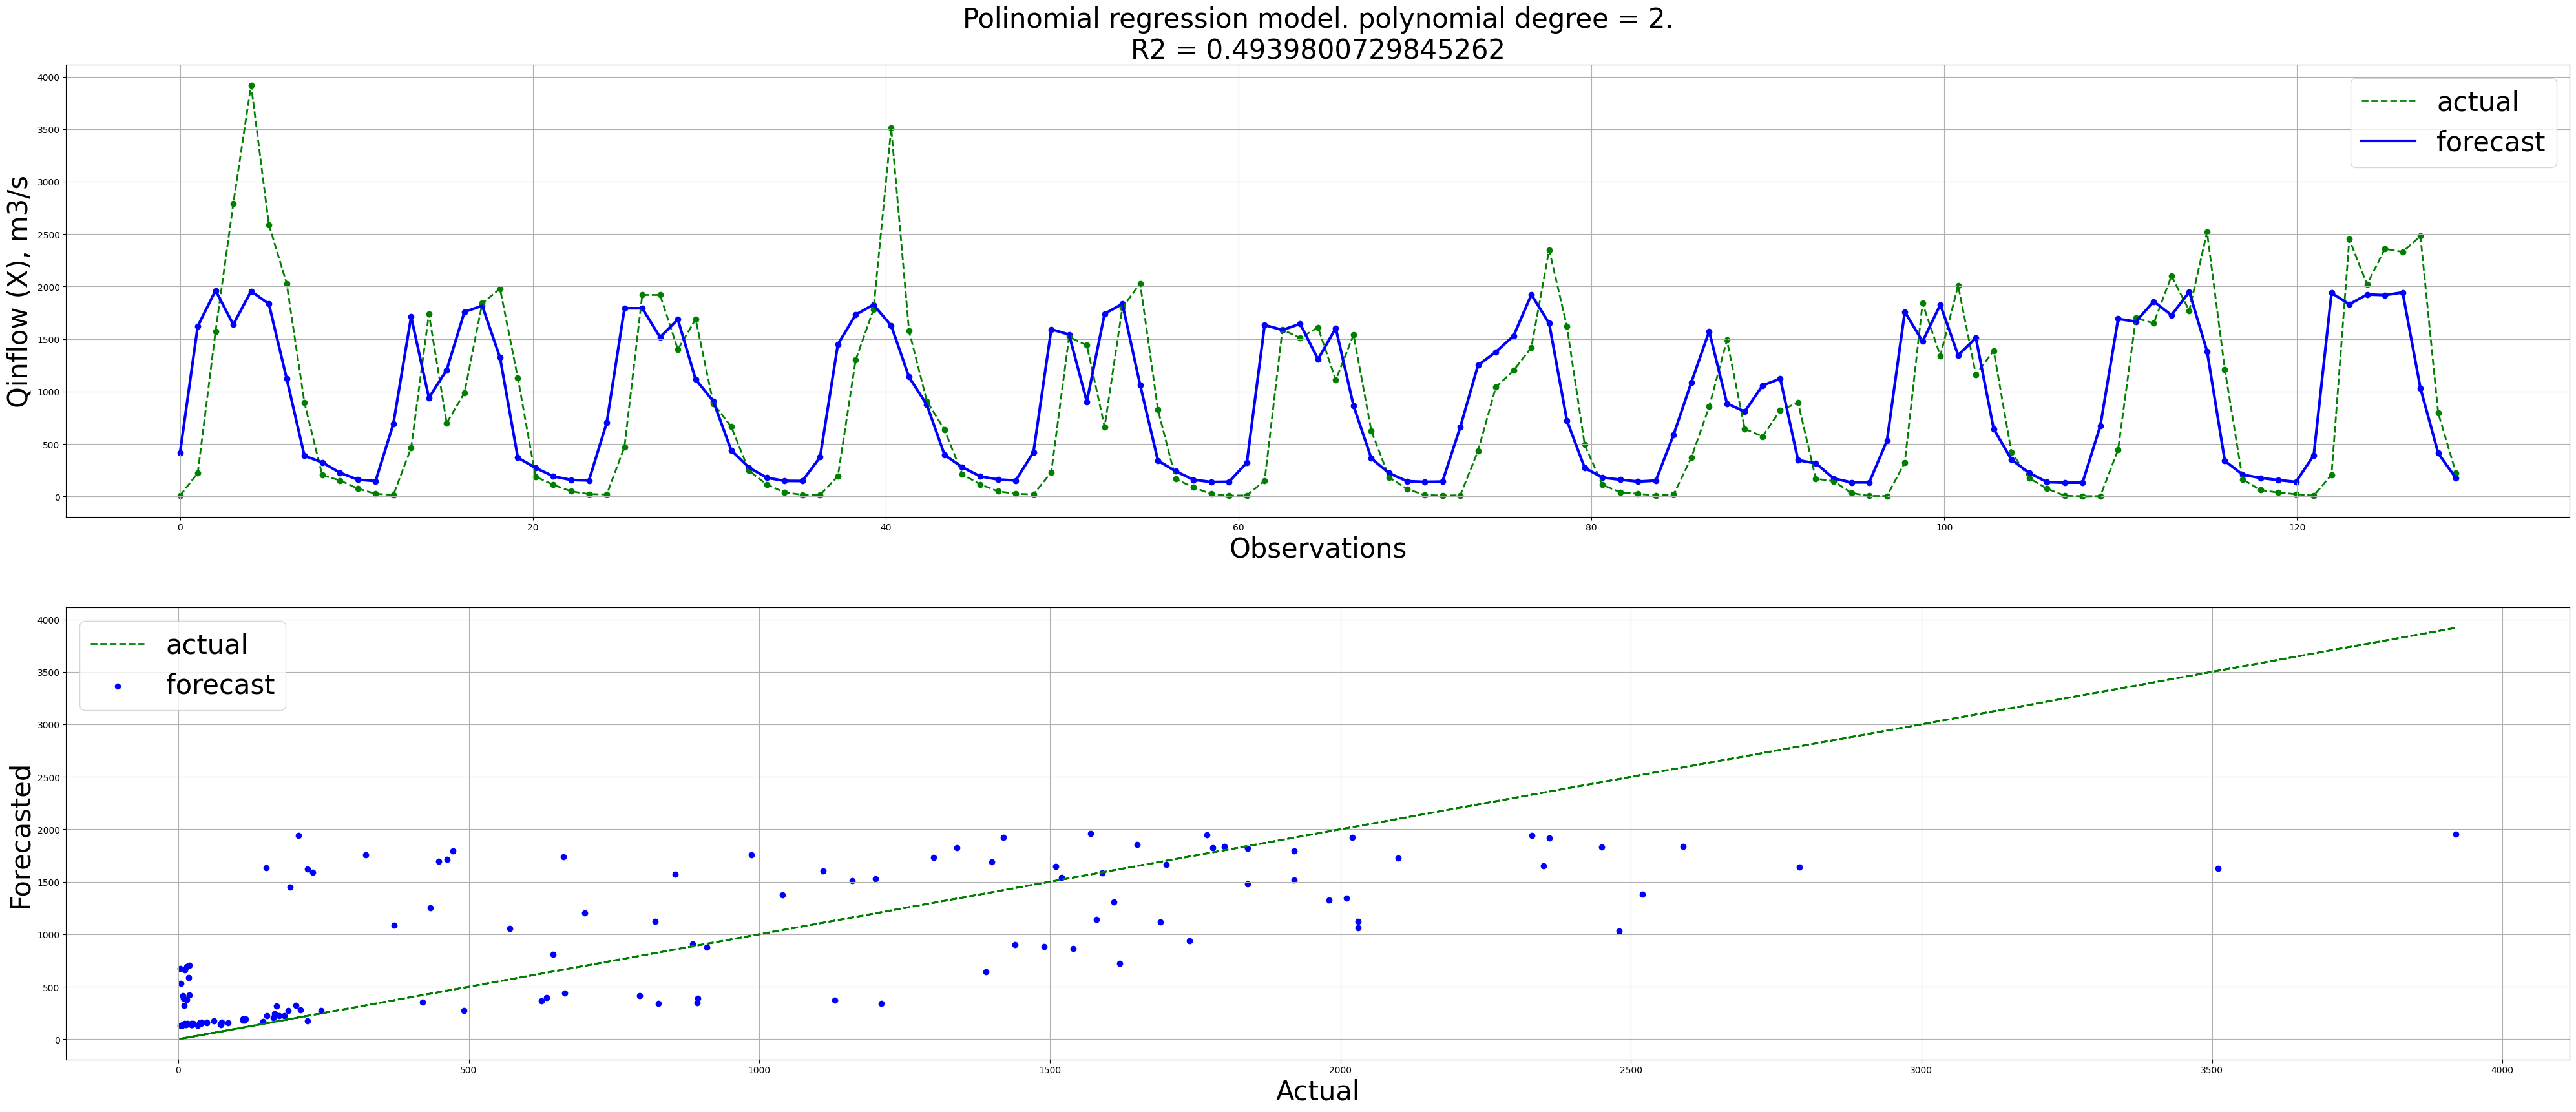

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=3, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002538,0.001862,0.371878,-571353.434470,-531.364184,-1697.863875
1,0.003712,0.001183,0.425125,-559318.017570,-526.871026,-1806.449447
2,0.001617,0.001164,0.497163,-660874.125506,-589.278418,-2857.101964
3,0.001527,0.001121,0.509699,-628850.429769,-512.626363,-2845.961108
4,0.001525,0.001138,0.381118,-492918.639091,-438.373572,-2612.360863


Mean squared error on test_set: 375457.9257
Root Mean Square Error on test_set: 612.7462
Root Absolute Percented Error on test_set: 2032.2274
R2  on test_set: 0.5090


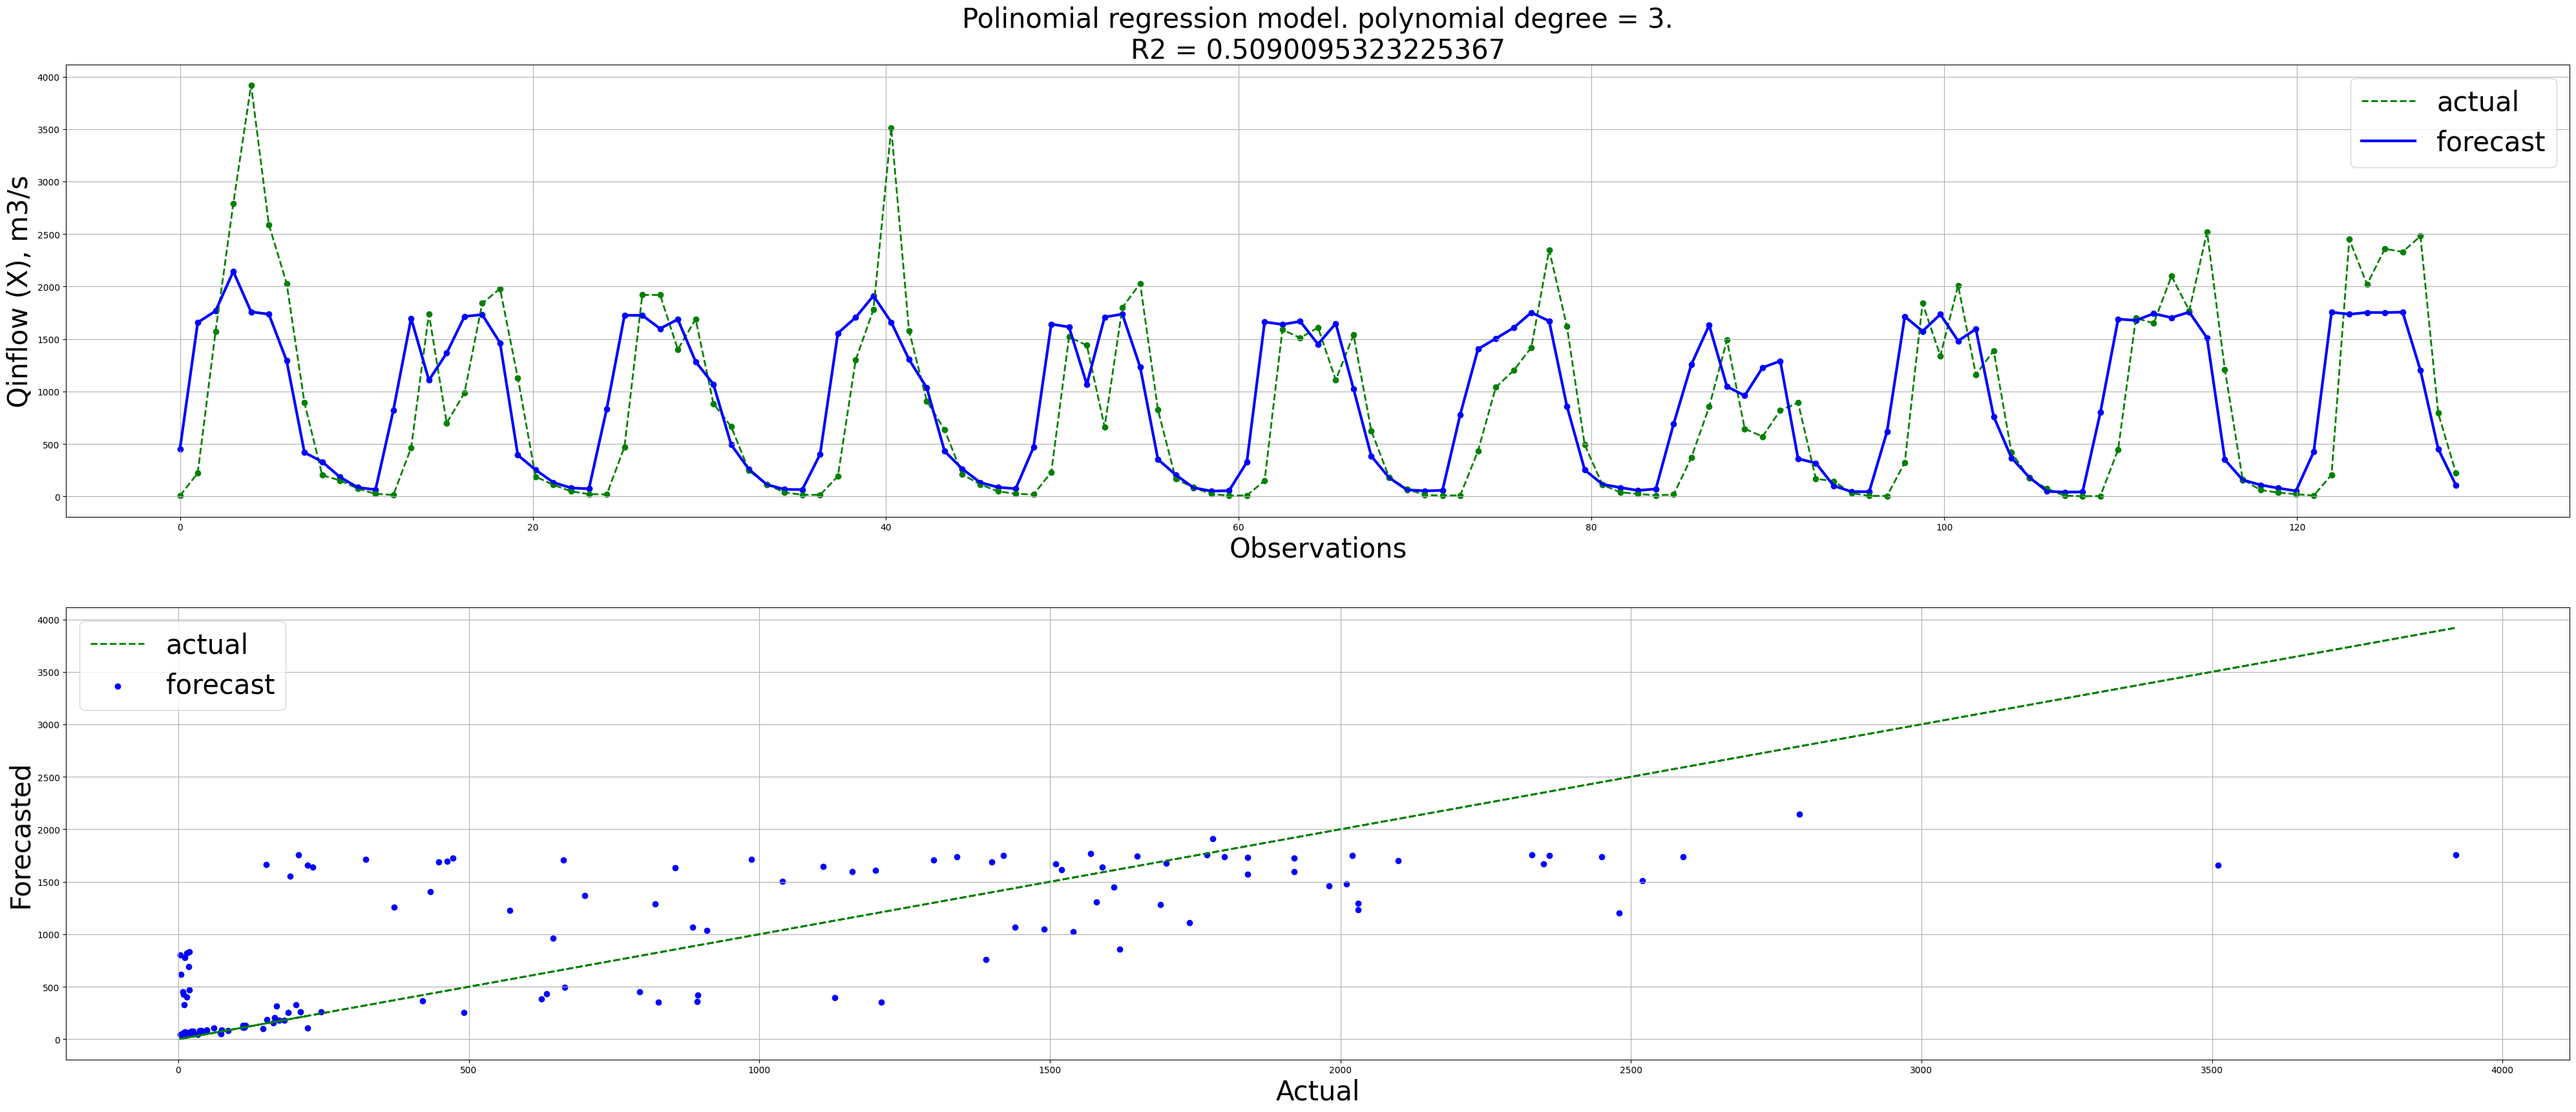

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=4, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002639,0.004792,0.523123,-437721.022094,-465.506979,-1787.673215
1,0.002423,0.001653,0.506886,-449827.951099,-473.518652,-1588.553538
2,0.002259,0.003672,0.251190,-429800.832049,-461.737523,-1530.076712
3,0.002280,0.001575,0.598410,-400365.685136,-430.886040,-1543.367231
4,0.002149,0.001520,0.614924,-398199.001925,-360.778720,-2772.652005


Mean squared error on test_set: 367642.3330
Root Mean Square Error on test_set: 606.3352
Root Absolute Percented Error on test_set: 2025.8850
R2  on test_set: 0.5192


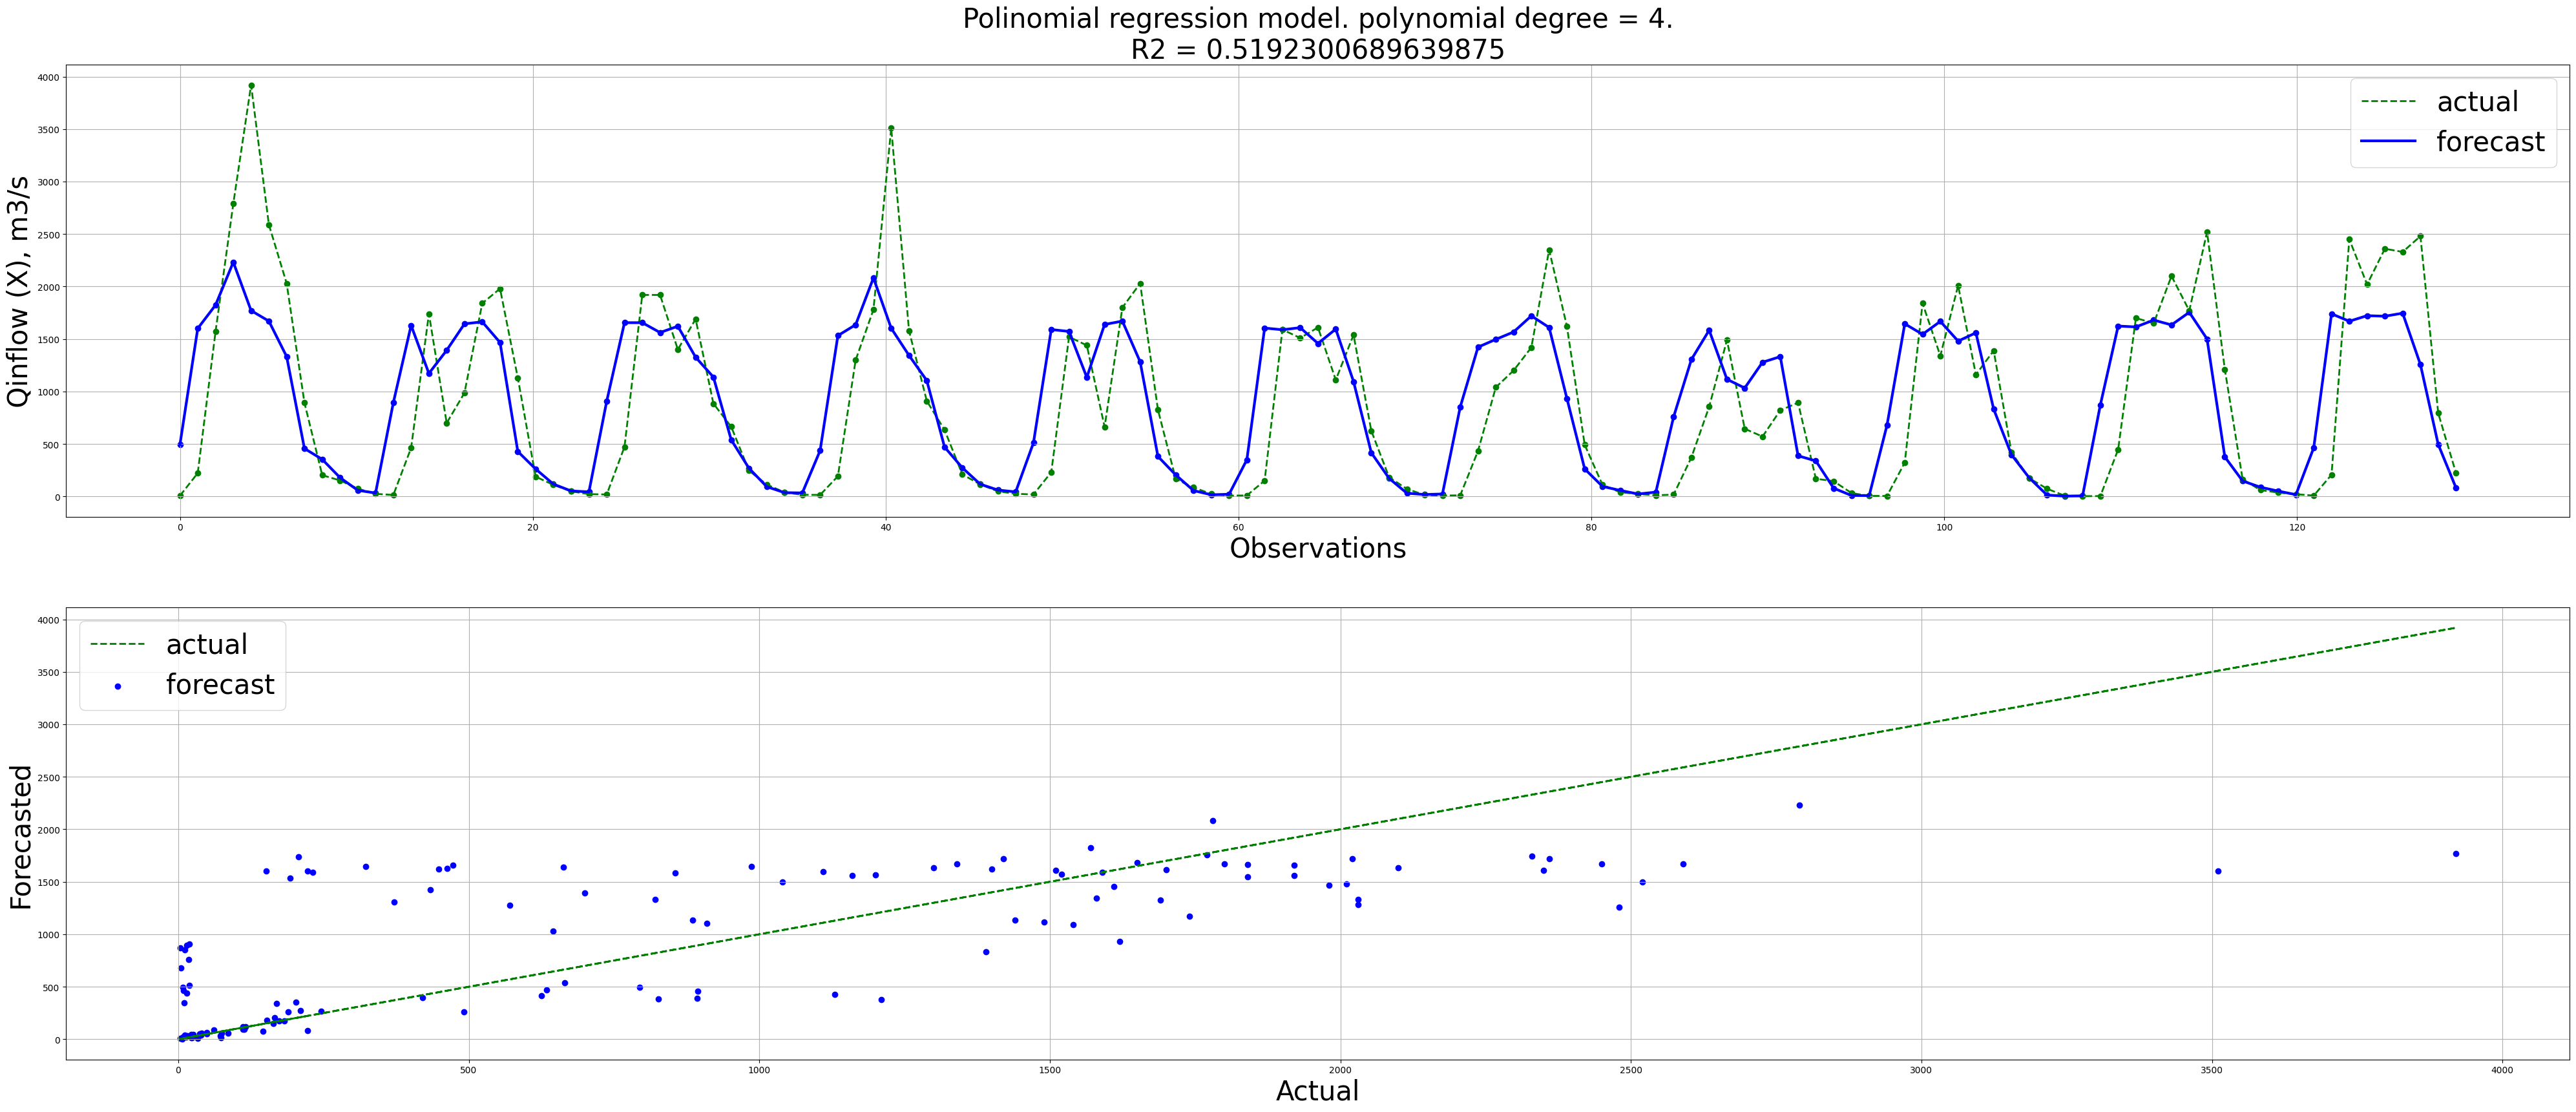

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=5, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002773,0.001982,0.304166,-697945.474926,-590.877741,-2765.798057
1,0.001787,0.001156,0.281678,-676631.836703,-495.968129,-2750.588510
2,0.001722,0.001180,0.488857,-499062.773032,-492.022318,-1741.701123
3,0.001768,0.001107,0.506743,-515535.001676,-463.990737,-1863.377428
4,0.001893,0.001169,0.622319,-239234.660620,-313.146303,-1533.945520


Mean squared error on test_set: 373172.4054
Root Mean Square Error on test_set: 610.8784
Root Absolute Percented Error on test_set: 2037.4310
R2  on test_set: 0.5120


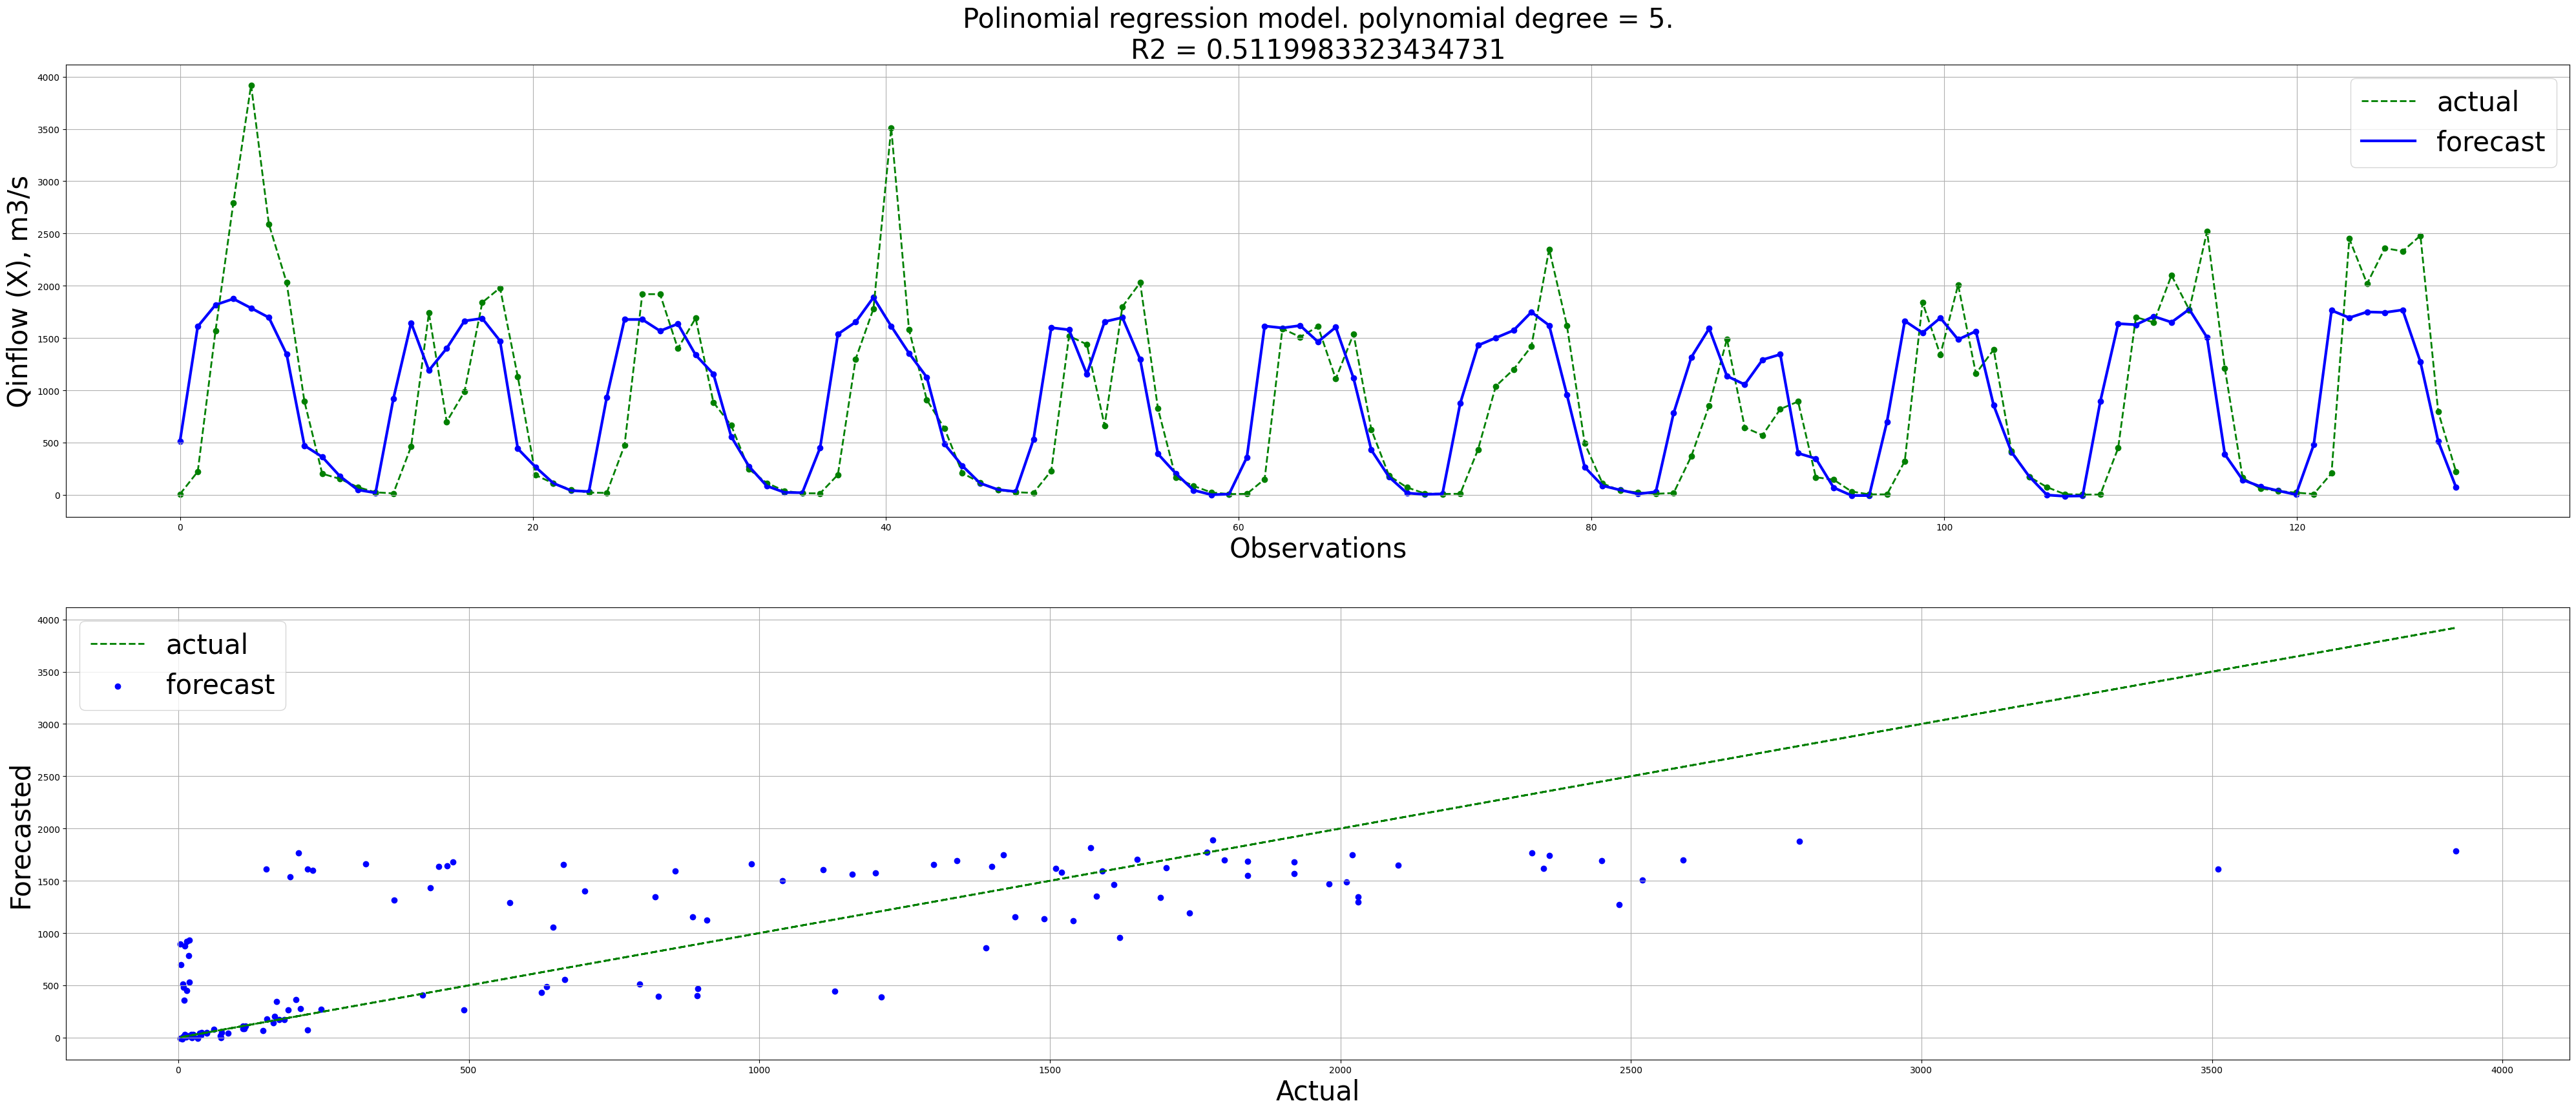

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
# Сводная таблица параметров оценки качества прогноза
inflow_data2 = pd.read_excel('/content/drive/MyDrive/Initial_data_PW2.xlsx', sheet_name= 'Лист1')
data = pd.DataFrame(data=inflow_data2)
data

,Unnamed: 0,Линейная регрессия,Полиномиальная регрессия (ст. 2),Полиномиальная регрессия (ст. 3),Полиномиальная регрессия (ст. 4),Полиномиальная регрессия (ст. 5)
0,MSE,395315.5852,386950.8771,375457.9257,367642.3330,373172.4054
1,RMSE,628.7413,622.0538,612.7462,606.3352,610.8784
2,MAPE,1921.2847,2006.0656,2032.2274,2025.8850,2037.4310
3,R2,0.4830,0.4940,0.5090,0.5192,0.5120


## Вывод

Изучили методы линейной и полиномиальной регрессии, применительно к задачам прогнозирования расхода в реке Бурея. Получили, что при применении метода линейной регрессии R2 = 0.4830. При исследовании полиномиальной регрессии получили, что при увеличении степени полинома до 4 R2 увеличивается, далее начинает уменьшаться. Из полученных результатов следует, что метод полиномиальной регрессии дает более точный результат в отличии от линейного.